In [1]:
from spyglass.ripple.v1 import RippleTimesV1, RippleParameters
from spyglass.common import interval_list_intersect
import numpy as np
from scipy.stats import ttest_rel

import os
import matplotlib.pyplot as plt

from ms_stim_analysis.AnalysisTables.ms_opto_stim_protocol import OptoStimProtocol
from ms_stim_analysis.Analysis.utils import filter_opto_data, violin_scatter
from ms_stim_analysis.Style.style_guide import animal_style, interval_style

from spyglass.position import PositionOutput

[2025-08-27 09:52:22,707][INFO]: DataJoint 0.14.6 connected to sambray@lmf-db.cin.ucsf.edu:3306


In [2]:
# Logging for database export. Not necessary for replication

from spyglass.common.common_usage import Export, ExportSelection

paper_key = {"paper_id": "speed_distributions"}

analysis_id = "ripploe_analaysis_difference"
ExportSelection().start_export(**paper_key, analysis_id=analysis_id)

export_key = {**paper_key, "analysis_id": analysis_id}

# (ExportSelection() & export_key).delete()

[09:52:37][INFO] Spyglass: Starting {'export_id': 43}


In [ ]:
from uuid import UUID


table = PositionOutput() & {"merge_id": UUID("2debe2b7-dfc8-fecc-5ef8-183309fee4cf")}
from spyglass.position.position_merge import source_class_dict
from datajoint.utils import to_camel_case

key = {"merge_id": ripple_key["pos_merge_id"]}
table = PositionOutput() & key

key = table.merge_restrict(table.fetch("KEY", as_dict=True)).fetch("KEY", as_dict=True)
# key = table.merge_restrict(table.proj()).proj()

source_query = (
    source_class_dict[to_camel_case((table.merge_get_parent(table.proj()).table_name))]
    & key
)

source_query.fetch1_dataframe()

# key = table.merge_restrict(table.proj()).proj()
# query = (
#     source_class_dict[
#         (table.merge_get_parent(table.proj()).camel_name)
#     ]
#     & key
# )

/home/sambray/mambaforge-pypy3/envs/ms_stim_analysis/lib/python3.10/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.8.0
ndx-franklab-novela - cached version: 0.1.0, loaded version: 0.2.1
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


,video_frame_ind,position_x,position_y,orientation,velocity_x,velocity_y,speed
time,,,,,,,
1.658260e+09,7.0,NaN,NaN,NaN,NaN,NaN,NaN
1.658260e+09,8.0,NaN,NaN,NaN,NaN,NaN,NaN
1.658260e+09,9.0,36.287136,106.938325,NaN,NaN,NaN,NaN
1.658260e+09,10.0,36.446865,106.650676,NaN,NaN,NaN,NaN
1.658260e+09,11.0,36.816549,106.055447,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1.658261e+09,36415.0,81.172127,130.665709,NaN,20.397799,0.750519,20.411602
1.658261e+09,36416.0,81.661229,130.747302,NaN,17.438418,-0.081170,17.438607
1.658261e+09,36417.0,82.268264,130.424733,NaN,14.285663,-0.686484,14.302148


In [20]:
print(ripple_key)

{'lfp_merge_id': UUID('580c130a-5fd3-39cd-6cf0-32154e44c9df'), 'filter_name': 'Ripple 150-250 Hz', 'filter_sampling_rate': 1000, 'nwb_file_name': 'Winnie20220719_.nwb', 'target_interval_list_name': 'Winnie20220719_.nwb_pos 1 valid times_LFP_default_difference', 'lfp_band_sampling_rate': 1000, 'group_name': 'CA1', 'ripple_param_name': 'default_ms', 'pos_merge_id': UUID('2debe2b7-dfc8-fecc-5ef8-183309fee4cf')}


## W-track. Run Sessions

[09:52:44][WARNING] Spyglass: Cannot export log join for
<class 'ms_stim_analysis.AnalysisTables.ms_opto_stim_protocol.OptoStimProtocolClosedLoop'>


datasets: 9


[09:52:59][WARNING] Spyglass: Cannot export log join for
*pos_merge_id  source      
+------------+ +----------+
0079a165-e876- DLCPosV1    
00d379ad-6849- DLCPosV1    
0136744a-53a1- DLCPosV1    
0171a6fc-44d4- DLCPosV1    
0179875f-080a- DLCPosV1    
01de3c3f-85bb- DLCPosV1    
02357833-b5eb- DLCPosV1    
027871c7-a5c1- DLCPosV1    
02ad4049-15ca- DLCPosV1    
03410268-82f3- DLCPosV1    
0347cd44-ce60- DLCPosV1    
03d12dfd-e756- DLCPosV1    
   ...
 (Total: 721)

/home/sambray/mambaforge-pypy3/envs/ms_stim_analysis/lib/python3.10/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.8.0
ndx-franklab-novela - cached version: 0.1.0, loaded version: 0.2.1
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.w

RuntimeError: Export cannot handle subquery restrictions. Please submit a bug report on GitHub with the code you ran and thisrestriction:
	 ( ((`merge_id`) in (SELECT `merge_id` FROM `position_merge`.`position_output` WHERE ( (`merge_id`=X'2debe2b7dfc8fecc5ef8183309fee4cf')))))

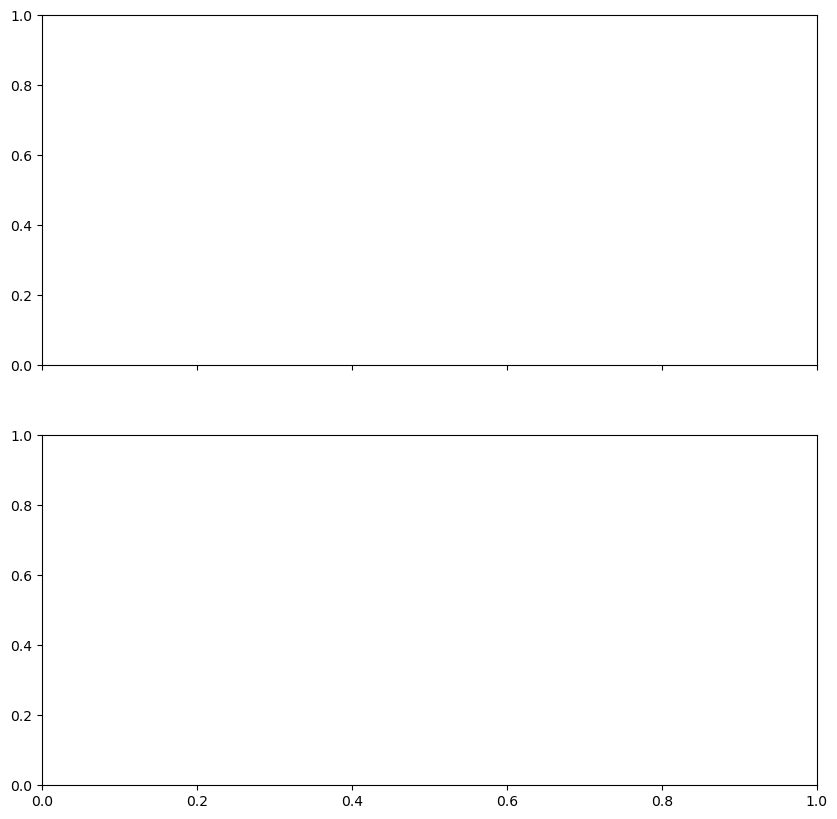

In [3]:
animal_list = [
    "Winnie",
    "Frodo",
    "Totoro",
    "Banner",
    "Bilbo",
    "Wallie",
    "Olive",
    "Yoshi",
]
# animal_list = ["Winnie","Yoshi"]

filter_speed = True
dlc_pos = True


fig, ax = plt.subplots(figsize=(10, 10), nrows=2, sharex=True)
ripple_lengths = {}
ripple_rates = {}
for animal in animal_list:
    ripple_lengths[animal] = {"test": [], "control": []}
    ripple_rates[animal] = {"test": [], "control": []}

for loc, animal in enumerate(animal_list):
    dataset_key = {
        "animal": animal,
        #    "period_ms":80,
        "targeted_phase": 90,
        "min_pulse_length": 20,
        "track_type": "early_wtrack",
    }

    dataset = filter_opto_data(
        dataset_key,
    )
    nwb_file_names = dataset.fetch("nwb_file_name")
    interval_list_names = dataset.fetch("interval_list_name")

    test_ripple_rate = []
    control_ripple_rate = []
    for nwb_file_name, interval_list_name in zip(nwb_file_names, interval_list_names):
        basic_key = {
            "nwb_file_name": nwb_file_name,
            "interval_list_name": interval_list_name,
        }
        ripple_key = {
            "nwb_file_name": nwb_file_name,
            "target_interval_list_name": f"{nwb_file_name}_{interval_list_name}_LFP_default_difference",
        }

        if dlc_pos:
            # query = (
            #     RippleTimesV1()
            #     & ripple_key
            #     & PositionOutput.DLCPosV1().proj(pos_merge_id="merge_id")
            # )
            source_key = {"source": "DLCPosV1"}
        else:
            query = (
                RippleTimesV1()
                & ripple_key
                & PositionOutput.TrodesV1().proj(pos_merge_id="merge_id")
            )
            source_key = {"source": "TrodesV1"}
        query = (RippleTimesV1 & ripple_key) * (
            PositionOutput.proj("source", pos_merge_id="merge_id") & source_key
        )
        if not query:
            print("No ripples for {}".format(ripple_key))
            continue
        ripple_key = query.fetch1("KEY")

        ripple_df = (RippleTimesV1() & ripple_key).fetch1_dataframe()
        all_ripples = [
            [start, end] for start, end in zip(ripple_df.start_time, ripple_df.end_time)
        ]
        control_intervals = (OptoStimProtocol & basic_key).fetch1("control_intervals")
        test_intervals = (OptoStimProtocol & basic_key).fetch1("test_intervals")

        control_ripples = interval_list_intersect(
            np.array(all_ripples), np.array(control_intervals)
        )
        test_ripples = interval_list_intersect(
            np.array(all_ripples), np.array(test_intervals)
        )

        # filter times when rat is stationary for rate calculation
        if filter_speed:
            # get the threshold speed from the ripple calculation
            ripple_param_name = (RippleTimesV1() & ripple_key).fetch1(
                "ripple_param_name"
            )
            thresh_speed = (
                RippleParameters() & {"ripple_param_name": ripple_param_name}
            ).fetch1("ripple_param_dict")["ripple_detection_params"]["speed_threshold"]
            # get the speed over time
            # pos_df = (
            #     TrodesPosV1() & basic_key & {"trodes_pos_params_name": "single_led"}
            # ).fetch1_dataframe()
            pos_df = (
                PositionOutput() & {"merge_id": ripple_key["pos_merge_id"]}
            ).fetch1_dataframe()
            pos_time = pos_df.index.values
            pos_speed = pos_df.speed.values
            # make intervals where rat is stationary
            speed_binary = (pos_speed < thresh_speed).astype(int)
            speed_binary = np.append([0], speed_binary)
            if np.min(speed_binary) == 1:
                run_intervals = [(pos_time[0], pos_time[-1])]
            t_diff = np.diff(speed_binary)
            t_run_start = pos_time[np.where(t_diff == 1)[0]]
            t_run_stop = pos_time[np.where(t_diff == -1)[0]]
            stationary_intervals = [
                (start, stop) for start, stop in zip(t_run_start, t_run_stop)
            ]
            # restrict the intervals by this
            control_intervals = interval_list_intersect(
                np.array(control_intervals), np.array(stationary_intervals)
            )
            test_intervals = interval_list_intersect(
                np.array(test_intervals), np.array(stationary_intervals)
            )

        test_ripple_lengths = [end - start for start, end in test_ripples]
        control_ripple_lengths = [end - start for start, end in control_ripples]
        ripple_lengths[animal]["test"].extend(test_ripple_lengths)
        ripple_lengths[animal]["control"].extend(control_ripple_lengths)

        len_test = np.sum([end - start for start, end in test_intervals])
        len_control = np.sum([end - start for start, end in control_intervals])

        test_ripple_rate.append(len(test_ripple_lengths) / len_test)
        control_ripple_rate.append(len(control_ripple_lengths) / len_control)

        ripple_rates[animal]["test"].append(len(test_ripple_lengths) / len_test)
        ripple_rates[animal]["control"].append(
            len(control_ripple_lengths) / len_control
        )

        # if len(test_ripple_rate)>10:
        #     break

    if len(test_ripple_rate) == 0:
        continue
    ax[0].scatter(
        np.ones(len(test_ripple_rate)) * 2 * loc + 1,
        test_ripple_rate,
        color=interval_style["test"],
    )
    ax[0].scatter(
        np.ones(len(control_ripple_rate)) * 2 * loc,
        control_ripple_rate,
        color=interval_style["control"],
    )
    for test, control in zip(test_ripple_rate, control_ripple_rate):
        ax[0].plot(
            [2 * loc, 2 * loc + 1], [control, test], color="black", alpha=0.1, zorder=-1
        )

    violin_scatter(
        np.array(test_ripple_rate) - np.array(control_ripple_rate),
        pos=2 * loc + 0.5,
        color=animal_style.loc[animal, "color"],
    )

    p_val = ttest_rel(test_ripple_rate, control_ripple_rate).pvalue
    if p_val < 0.05:
        y_loc = 0.8
        ax[0].scatter([2 * loc + 0.5], [y_loc], color="k", marker="*")


plt.xticks(2 * np.arange(len(animal_list)) + 0.5, animal_list, rotation=45, ha="right")
plt.plot([-0.5, 2 * len(animal_list) - 0.5], [0, 0], color="black", ls=":", alpha=0.5)
ax[0].set_ylabel("Ripple Rate (events/s)")
ax[1].set_ylabel("Test-Control Ripple Rate (events/s)")
fig.suptitle("Ripple Rate During Run epochs")

### Plot rate differences

Winnie: n epochs = 9
Frodo: n epochs = 9
Totoro: n epochs = 10
Banner: n epochs = 16
Bilbo: n epochs = 8
Wallie: n epochs = 10
Olive: n epochs = 8
Yoshi: n epochs = 15


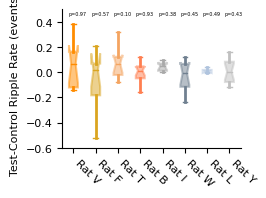

In [4]:
from scipy.stats import ttest_rel

plt.rcParams.update({"font.size": 8})
fig = plt.figure(figsize=(2.3, 1.8))
ax = fig.gca()

for i, animal in enumerate(ripple_lengths):
    c = animal_style.loc[animal, "color"]
    # break
    print(f"{animal}: n epochs = {len(ripple_rates[animal]['test'])}")
    delta_rate = np.array(ripple_rates[animal]["test"]) - np.array(
        ripple_rates[animal]["control"]
    )
    plt.boxplot(
        delta_rate,
        positions=[i],
        widths=0.4,
        patch_artist=True,
        showmeans=False,
        # showmedians=False,
        boxprops=dict(facecolor=c, alpha=0.5, edgecolor=c, lw=1.5),
        capprops=dict(color=c),
        whiskerprops=dict(color=c, lw=2),
        flierprops=dict(color=c, markeredgecolor=c),
        medianprops=dict(color=c),
        notch=True,
        showfliers=False,
    )

    p_val = ttest_rel(
        ripple_rates[animal]["test"], ripple_rates[animal]["control"]
    ).pvalue
    plt.text(i - 0.2, 0.45, f"p={p_val:.2f}", fontsize=3.5)
    loc = np.max(delta_rate) + 0.02
    if p_val < 0.05:
        ax.plot([i], [loc, loc], color="black", alpha=0.5, zorder=-1)
        plt.scatter([i], [loc + 0.02], color="black", marker="*")

plt.ylim(-0.6, 0.5)
alias_list = [animal_style.loc[animal, "alias"] for animal in ripple_lengths]
plt.xticks(range(len(ripple_lengths)), alias_list, rotation=-45, ha="left")
ax.spines[["top", "right"]].set_visible(False)
plt.ylabel("Test-Control Ripple Rate (events/s)")
plt.rcParams["svg.fonttype"] = "none"
# fig.savefig("/home/sambray/Documents/MS_analysis_samsplaying/Figures_20241201/change_in_ripple_rate.svg",)

### plot rates

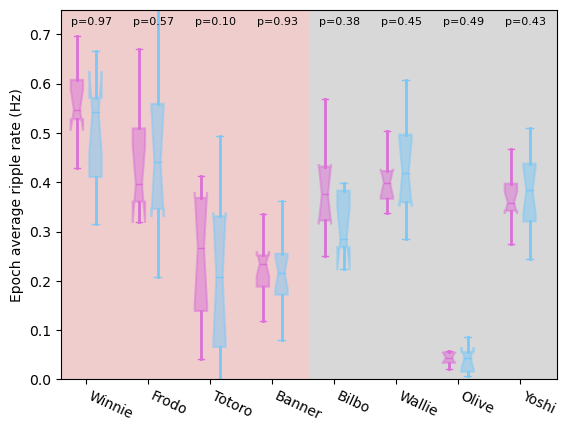

In [14]:
from scipy.stats import ttest_rel

fig = plt.figure()
ax = fig.gca()
for i, animal in enumerate(ripple_lengths):
    c = animal_style.loc[animal, "color"]
    for j, interval in enumerate(["test", "control"]):
        c = interval_style[interval]
        plt.boxplot(
            ripple_rates[animal][interval],
            positions=[2 * i + j * 0.6],
            widths=0.4,
            patch_artist=True,
            showmeans=False,
            # showmedians=False,
            boxprops=dict(facecolor=c, alpha=0.5, edgecolor=c, lw=1.5),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, lw=2),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            notch=True,
            showfliers=False,
        )

    plt.fill_between(
        [2 * i - 0.5, 2 * (i + 1) - 0.5],
        0,
        0.8,
        facecolor=animal_style.loc[animal, "background"],
        alpha=0.3,
        zorder=-1,
    )

    p_val = ttest_rel(
        ripple_rates[animal]["test"], ripple_rates[animal]["control"]
    ).pvalue
    plt.text(2 * i - 0.2, 0.72, f"p={p_val:.2f}", fontsize=8)
    loc = np.max([ripple_rates[animal]["test"], ripple_rates[animal]["control"]]) + 0.02
    if p_val < 0.05:
        ax.plot([2 * i, 2 * i + 1], [loc, loc], color="black", alpha=0.5, zorder=-1)
        plt.scatter([2 * i + 0.5], [loc + 0.02], color="black", marker="*")

ax.set_ylim([0, 0.75])
ax.set_xlim(-0.5, 2 * len(animal_list) - 0.5)
ax.set_xticks(2 * np.arange(len(animal_list)) + 0.3)
ax.set_xticklabels(animal_list, rotation=-25, ha="left")
plt.ylabel("Epoch average ripple rate (Hz)")
plt.show()

plt.rcParams["svg.fonttype"] = "none"
fig.savefig(
    "/home/sambray/Documents/MS_analysis_samsplaying/Plots/fens_2024/ripple_rate_runs.svg",
    format="svg",
)

### Plot Change in lengths

Winnie: n control ripples = 963
Winnie: n test ripples = 2434
Frodo: n control ripples = 243
Frodo: n test ripples = 902
Totoro: n control ripples = 372
Totoro: n test ripples = 1290
Banner: n control ripples = 555
Banner: n test ripples = 1570
Bilbo: n control ripples = 352
Bilbo: n test ripples = 791
Wallie: n control ripples = 1019
Wallie: n test ripples = 2178
Olive: n control ripples = 49
Olive: n test ripples = 155
Yoshi: n control ripples = 1447
Yoshi: n test ripples = 2899


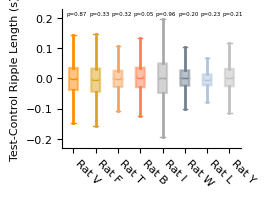

In [ ]:
from scipy.stats import ttest_ind

fig = plt.figure(figsize=(2.3, 1.8))
ax = fig.gca()
for i, animal in enumerate(ripple_lengths):
    c = animal_style.loc[animal, "color"]

    # break

    control_lengths = np.array(ripple_lengths[animal]["control"])
    test_lengths = np.array(ripple_lengths[animal]["test"])
    control_lengths = control_lengths[control_lengths < 3]
    test_lengths = test_lengths[test_lengths < 3]
    control_lengths.shape, test_lengths.shape
    delta_length = np.ravel(np.subtract.outer(test_lengths, control_lengths))
    print(f"{animal}: n control ripples = {len(control_lengths)}")
    print(f"{animal}: n test ripples = {len(test_lengths)}")
    plt.boxplot(
        delta_length,
        positions=[i],
        widths=0.4,
        patch_artist=True,
        showmeans=False,
        # showmedians=False,
        boxprops=dict(facecolor=c, alpha=0.5, edgecolor=c, lw=1.5),
        capprops=dict(color=c),
        whiskerprops=dict(color=c, lw=2),
        flierprops=dict(color=c, markeredgecolor=c),
        medianprops=dict(color=c),
        notch=True,
        showfliers=False,
    )

    p_val = ttest_ind(control_lengths, test_lengths).pvalue
    plt.text(i - 0.3, 0.21, f"p={p_val:.2f}", fontsize=4)
    loc = np.max([ripple_rates[animal]["test"], ripple_rates[animal]["control"]]) + 0.02
    if p_val < 0.05:
        # ax.plot([2 * i, 2 * i + 1], [loc, loc], color="black", alpha=0.5, zorder=-1)
        plt.scatter([i], [loc + 0.02], color="black", marker="*")
plt.ylim(-0.23, 0.23)
ax.spines[["top", "right"]].set_visible(False)
animal_alias = [animal_style.loc[animal, "alias"] for animal in ripple_lengths]
plt.xticks(range(len(ripple_lengths)), animal_alias, rotation=-45, ha="left")
plt.ylabel("Test-Control Ripple Length (s)")
plt.rcParams["svg.fonttype"] = "none"
# fig.savefig("/home/sambray/Documents/MS_analysis_samsplaying/Figures_20241201/change_in_ripple_length.svg",)

(array([7.000000e+00, 2.000000e+00, 0.000000e+00, 2.000000e+00,
        5.750000e+02, 2.205000e+03, 1.713000e+03, 1.155000e+03,
        5.100000e+01, 1.800000e+01, 2.426000e+03, 3.203000e+03,
        9.600000e+01, 3.100000e+01, 3.500000e+01, 2.642000e+03,
        3.996000e+03, 6.997000e+03, 2.323000e+03, 1.644200e+04,
        1.957000e+04, 9.050000e+03, 1.788900e+04, 2.232250e+05,
        3.530782e+06, 2.525040e+05, 2.090100e+04, 1.480100e+04,
        1.939400e+04, 1.708500e+04, 7.761000e+03, 6.401000e+03,
        8.578000e+03, 3.397000e+03, 1.279000e+03, 2.133000e+03,
        7.070000e+02, 9.900000e+01, 2.707000e+03, 3.779000e+03,
        6.350000e+02, 1.323000e+03, 1.000000e+00, 3.000000e+00,
        2.000000e+00, 2.000000e+00, 7.000000e+00, 6.000000e+00,
        3.000000e+00]),
 array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
        -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
        -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2

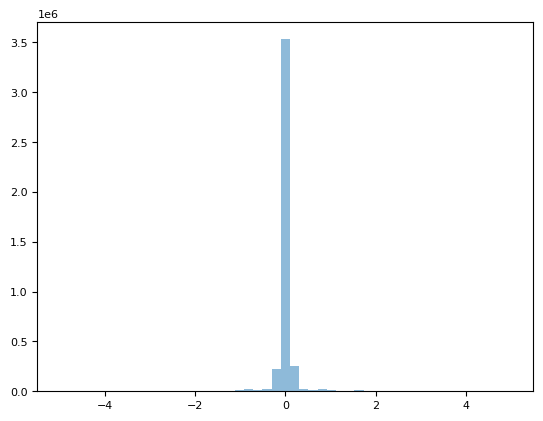

In [53]:
plt.hist(delta_length, bins=np.linspace(-5, 5), alpha=0.5)

### plot lengths

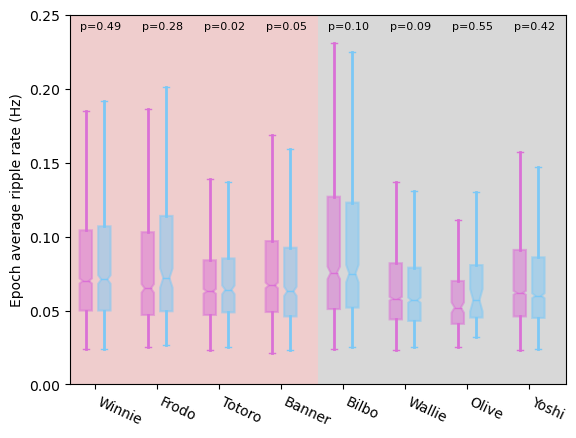

In [17]:
from scipy.stats import ttest_ind

fig = plt.figure()
ax = fig.gca()
for i, animal in enumerate(ripple_lengths):
    c = animal_style.loc[animal, "color"]
    for j, interval in enumerate(["test", "control"]):
        c = interval_style[interval]
        plt.boxplot(
            ripple_lengths[animal][interval],
            positions=[2 * i + j * 0.6],
            widths=0.4,
            patch_artist=True,
            showmeans=False,
            # showmedians=False,
            boxprops=dict(facecolor=c, alpha=0.5, edgecolor=c, lw=1.5),
            capprops=dict(color=c),
            whiskerprops=dict(color=c, lw=2),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            notch=True,
            showfliers=False,
        )

    plt.fill_between(
        [2 * i - 0.5, 2 * (i + 1) - 0.5],
        0,
        0.8,
        facecolor=animal_style.loc[animal, "background"],
        alpha=0.3,
        zorder=-1,
    )

    p_val = ttest_ind(
        ripple_lengths[animal]["test"], ripple_lengths[animal]["control"]
    ).pvalue
    plt.text(2 * i - 0.2, 0.24, f"p={p_val:.2f}", fontsize=8)
    loc = np.max(
        [
            np.max(ripple_lengths[animal]["test"]),
            np.max(ripple_lengths[animal]["control"]),
        ]
    )  # +.02
    if p_val < 0.05:
        ax.plot([2 * i, 2 * i + 1], [loc, loc], color="black", alpha=0.5, zorder=-1)
        plt.scatter([2 * i + 0.5], [loc + 0.02], color="black", marker="*")

ax.set_ylim([0, 0.25])
ax.set_xlim(-0.5, 2 * len(animal_list) - 0.5)
ax.set_xticks(2 * np.arange(len(animal_list)) + 0.3)
ax.set_xticklabels(animal_list, rotation=-25, ha="left")
plt.ylabel("Epoch average ripple rate (Hz)")
plt.show()

plt.rcParams["svg.fonttype"] = "none"
# fig.savefig(
#     "/home/sambray/Documents/MS_analysis_samsplaying/Plots/fens_2024/ripple_lengths_runs.svg",
#     format="svg",
# )

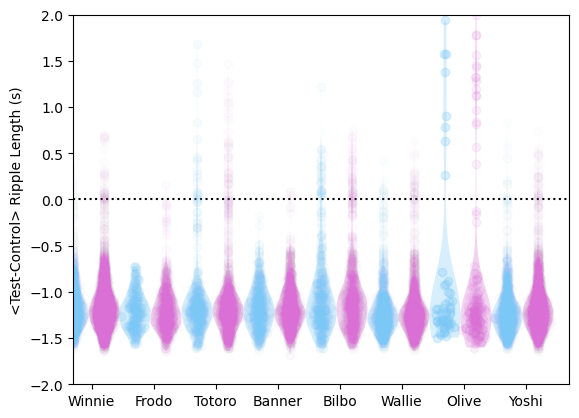

In [39]:
fig = plt.figure()
ax = fig.gca()

for i, animal in enumerate(animal_list):
    l1 = np.array(ripple_lengths[animal]["test"])
    l2 = np.array(ripple_lengths[animal]["control"])
    # l1 = l1[l1<5]
    # l2 = l2[l2<5]

    # vals = np.ravel(np.subtract.outer(l1,l2))
    # vals = vals[np.random.randint(vals.size, size=10000)]
    # violin_scatter(vals,pos=i+.5,color=animal_style.loc[animal,"color"])

    # ax.fill_between([i,i+1],-5,5,facecolor=animal_style.loc[animal,"background"],alpha=.1)
    #    break

    l1 = np.log10(l1)
    l2 = np.log10(l2)
    violin_scatter(l2, pos=i + 0.0, color=interval_style["control"])
    violin_scatter(l1, pos=i + 0.5, color=interval_style["test"])
    # break
ax.plot([0, len(animal_list)], [0, 0], color="k", ls=":", zorder=-1)
ax.set_xticks(np.arange(len(animal_list)) + 0.3, labels=animal_list)
ax.set_xlim(0, len(animal_list))
ax.set_ylim(-2, 2)
ax.set_ylabel("<Test-Control> Ripple Length (s)")
plt.rcParams["svg.fonttype"] = "none"
# fig.savefig("./Plots/ripple_length_difference.svg")
# fig.savefig("./Plots/ripple_length_absolute.svg")

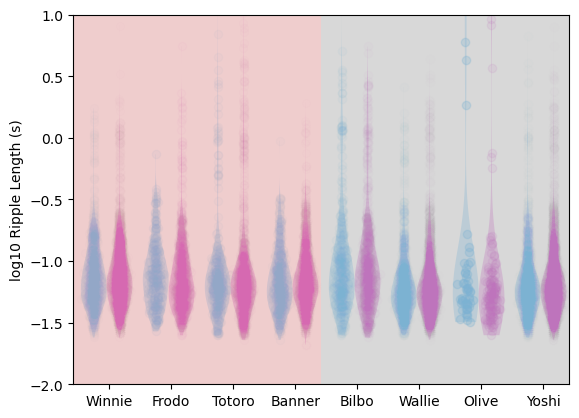

In [18]:
fig = plt.figure()
ax = fig.gca()

for i, animal in enumerate(animal_list):
    l1 = np.array(ripple_lengths[animal]["test"])
    l2 = np.array(ripple_lengths[animal]["control"])

    l1 = np.log10(l1)
    l2 = np.log10(l2)
    violin_scatter(l2, pos=i * 1.2 + 0.0, color=interval_style["control"])
    violin_scatter(l1, pos=i * 1.2 + 0.5, color=interval_style["test"])
    ax.fill_between(
        [i * 1.2 - 0.4, i * 1.2 + 0.8],
        -5,
        5,
        facecolor=animal_style.loc[animal, "background"],
        alpha=0.3,
    )
    # break

ax.set_xticks(np.arange(len(animal_list)) * 1.2 + 0.3, labels=animal_list)
ax.set_xlim(-0.4, len(animal_list) * 1.2 - 0.4)
ax.set_ylim(-2, 1)
ax.set_ylabel("log10 Ripple Length (s)")
plt.rcParams["svg.fonttype"] = "none"
fig.savefig("./Plots/ripple_length_absolute.svg")

In [107]:
len(all_ripples) == len(test_ripples) + len(control_ripples)

True

## W-track sleeps epochs

datasets: 16


Text(0.5, 1.0, 'Ripple Rate During Sleep epochs')

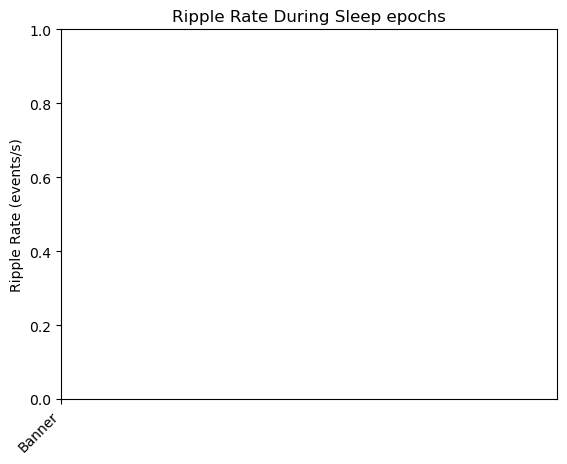

In [26]:
from spyglass.common import PositionIntervalMap, IntervalList
from spyglass.position.v1 import TrodesPosV1

animal_list = [
    # "Winnie",
    # "Frodo",
    # "Totoro",
    "Banner",
    # "Bilbo",
    # "Wallie",
    # "Olive",
    # "Yoshi",
]
filter_speed = True


for loc, animal in enumerate(animal_list):
    dataset_key = {
        "animal": animal,
        #    "period_ms":80,
        "min_pulse_length": 20,
        "track_type": "wtrack",
    }

    # get sleep interval sets
    dataset = filter_opto_data(
        dataset_key,
    )
    nwb_file_set = np.unique(dataset.fetch("nwb_file_name"))
    nwb_file_names = []
    interval_list_names = []
    for nwb_file_name in nwb_file_set:
        sleep_interval_names = (
            PositionIntervalMap
            & {
                "nwb_file_name": nwb_file_name,
            }
            & "interval_list_name LIKE '%sleep%'"
        ).fetch("position_interval_name")
        sleep_interval_names = (
            PositionIntervalMap
            & {
                "nwb_file_name": nwb_file_name,
            }
            & "interval_list_name LIKE '%sleep%'"
        ).fetch("position_interval_name")
        for interval in sleep_interval_names:
            nwb_file_names.append(nwb_file_name)
            interval_list_names.append(interval)

    ripple_rate = []
    for nwb_file_name, interval_list_name in zip(nwb_file_names, interval_list_names):
        ripple_key = {
            "nwb_file_name": nwb_file_name,
            "target_interval_list_name": f"{nwb_file_name}_{interval_list_name}_LFP_default_difference",  # interval_list_name,}
        }
        basic_key = {
            "nwb_file_name": nwb_file_name,
            "interval_list_name": interval_list_name,
        }
        if not RippleTimesV1() & ripple_key:
            print("No ripples for {}".format(ripple_key))
            continue

        ripple_df = (RippleTimesV1() & ripple_key).fetch1_dataframe()
        all_ripples = [
            [start, end] for start, end in zip(ripple_df.start_time, ripple_df.end_time)
        ]

        valid_times = (IntervalList & basic_key).fetch1("valid_times")
        # filter times when rat is stationary for rate calculation
        if filter_speed:
            # get the threshold speed from the ripple calculation
            ripple_param_name = (RippleTimesV1() & ripple_key).fetch1(
                "ripple_param_name"
            )
            thresh_speed = (
                RippleParameters() & {"ripple_param_name": ripple_param_name}
            ).fetch1("ripple_param_dict")["ripple_detection_params"]["speed_threshold"]
            # get the speed over time
            pos_df = (
                TrodesPosV1() & basic_key & {"trodes_pos_params_name": "single_led"}
            ).fetch1_dataframe()
            pos_time = pos_df.index.values
            pos_speed = pos_df.speed.values
            # make intervals where rat is stationary
            speed_binary = (pos_speed < thresh_speed).astype(int)
            speed_binary = np.append([0], speed_binary)
            if np.min(speed_binary) == 1:
                run_intervals = [(pos_time[0], pos_time[-1])]
            t_diff = np.diff(speed_binary)
            t_run_start = pos_time[np.where(t_diff == 1)[0]]
            t_run_stop = pos_time[np.where(t_diff == -1)[0]]
            stationary_intervals = [
                (start, stop) for start, stop in zip(t_run_start, t_run_stop)
            ]
            # restrict the intervals by this
            valid_times = interval_list_intersect(
                np.array(valid_times), np.array(stationary_intervals)
            )
        len_sleep = np.sum([end - start for start, end in valid_times])
        ripple_rate.append(len(all_ripples) / len_sleep)
        # if len(ripple_rate)>3:
        #     continue

    if not ripple_rate:
        continue
    violin_scatter(ripple_rate, pos=loc, color=animal_style.loc[animal, "color"])
    # plt.violinplot(ripple_rate, positions=[loc], showextrema=False, widths=.5)
    # plt.scatter(np.ones(len(ripple_rate))*loc+np.random.normal(0,.1,len(ripple_rate)), ripple_rate, alpha=.5)


plt.xticks(np.arange(len(animal_list)), animal_list, rotation=45, ha="right")
plt.ylabel("Ripple Rate (events/s)")
plt.title("Ripple Rate During Sleep epochs")

In [35]:
from spyglass.common import (
    TaskEpoch,
    convert_epoch_interval_name_to_position_interval_name,
    RawPosition,
)

sleep_interval_names
key = {
    "nwb_file_name": nwb_file_name,
}
TaskEpoch & key
RawPosition & key


# epoch = "01_sleepBan77mWnostim"
# convert_epoch_interval_name_to_position_interval_name()
# PositionIntervalMap().populate({"nwb_file_name":nwb_file_name,
#                                 "interval_list_name": "01_sleepBan77mWnostim"})

nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list
Banner20220225_.nwb,pos 0 valid times
Banner20220225_.nwb,pos 1 valid times
Banner20220225_.nwb,pos 2 valid times
Banner20220225_.nwb,pos 3 valid times
Banner20220225_.nwb,pos 4 valid times
Banner20220225_.nwb,pos 5 valid times
Banner20220225_.nwb,pos 6 valid times
Banner20220225_.nwb,pos 7 valid times


{'bodies': [<matplotlib.collections.PolyCollection at 0x7f1ca0803df0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f1ca07fb040>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f1c927e86a0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f1c927e8a90>}

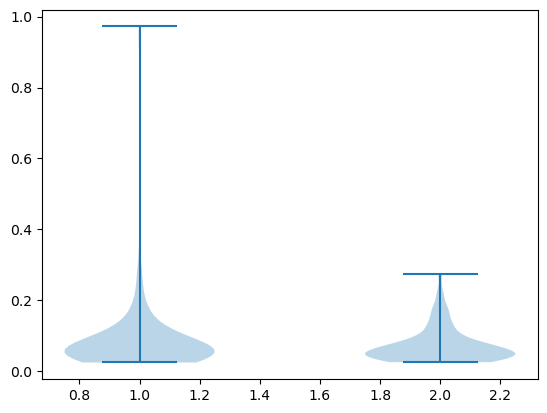

In [9]:
test_ripple_lengths = [end - start for start, end in test_ripples]
control_ripple_lengths = [end - start for start, end in control_ripples]

len_test = np.sum([end - start for start, end in test_intervals])
len_control = np.sum([end - start for start, end in control_intervals])
import matplotlib.pyplot as plt

plt.violinplot([test_ripple_lengths, control_ripple_lengths])

In [24]:
from spyglass.sharing import AnalysisNwbfileKachery

AnalysisNwbfileKachery.populate()

[11:54:16][INFO] Spyglass: Linking j1620210710_9XZG10Y7IT.nwb in kachery-cloud...
--- Logging error ---
Traceback (most recent call last):
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/pyth

/stelmo/nwb/.kachery-cloud/linked_files/sha1/b1/e5/93/b1e5939b1851a68b9f380c13136e12e62ee91154
/stelmo/nwb/.kachery-cloud/sha1/b1/e5/93/b1e5939b1851a68b9f380c13136e12e62ee91154


--- Logging error ---
Traceback (most recent call last):
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/s

/stelmo/nwb/.kachery-cloud/linked_files/sha1/50/ab/94/50ab94f88171a7581169cea8eb024afa9137b688
/stelmo/nwb/.kachery-cloud/sha1/50/ab/94/50ab94f88171a7581169cea8eb024afa9137b688
